In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%store -r c1x
df = c1x
df

,Client,Date,Daily Flows,Cash Balance
0,6,2019-06-25,1257.19,1257.19
1,6,2019-06-27,-801.46,455.73
2,6,2019-06-30,4000.00,4455.73
3,6,2019-07-01,684.42,5140.15
4,6,2019-07-03,-160.27,4979.88
...,...,...,...,...
117,6,2020-06-15,-203.54,18987.46
118,6,2020-06-19,-31.46,18956.00
119,6,2020-06-20,0.00,18956.00
120,6,2020-06-25,-1553.42,17402.58


In [3]:
df['Date']

0     2019-06-25
1     2019-06-27
2     2019-06-30
3     2019-07-01
4     2019-07-03
         ...    
117   2020-06-15
118   2020-06-19
119   2020-06-20
120   2020-06-25
121   2020-06-26
Name: Date, Length: 122, dtype: datetime64[ns]

In [4]:
df.index = df.pop('Date')
df.head()

,Client,Daily Flows,Cash Balance
Date,,,
2019-06-25,6,1257.19,1257.19
2019-06-27,6,-801.46,455.73
2019-06-30,6,4000.00,4455.73
2019-07-01,6,684.42,5140.15
2019-07-03,6,-160.27,4979.88


In [5]:
df = df.sort_values('Date')
df

,Client,Daily Flows,Cash Balance
Date,,,
2019-06-25,6,1257.19,1257.19
2019-06-27,6,-801.46,455.73
2019-06-30,6,4000.00,4455.73
2019-07-01,6,684.42,5140.15
2019-07-03,6,-160.27,4979.88
...,...,...,...
2020-06-15,6,-203.54,18987.46
2020-06-19,6,-31.46,18956.00
2020-06-20,6,0.00,18956.00


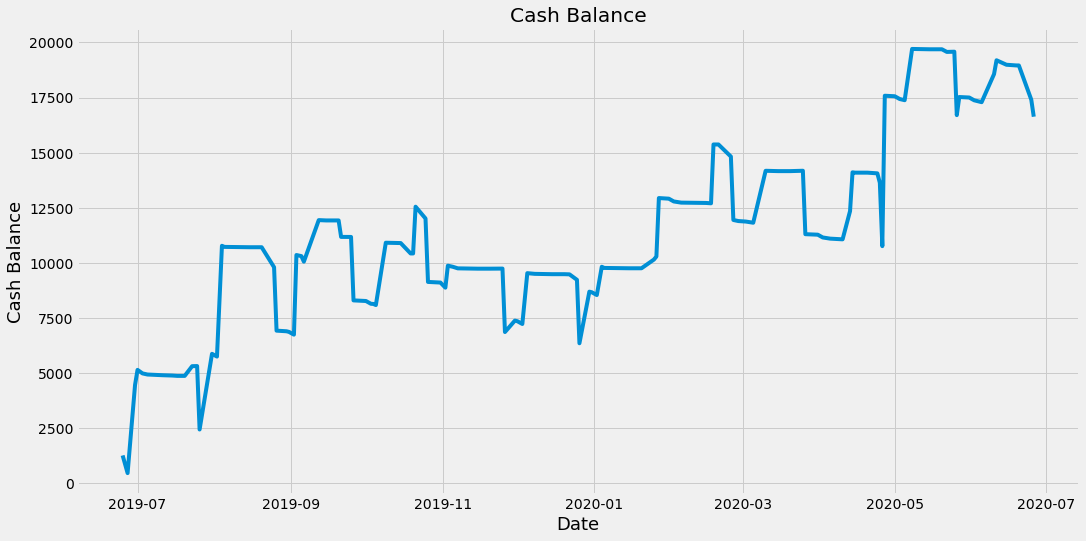

In [6]:
#Visualize the data
plt.figure(figsize = (16,8))
plt.title('Cash Balance')
plt.plot(df['Cash Balance'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Cash Balance', fontsize = 18)
plt.show()

In [7]:
#Create a new dataframe
data = df.filter(['Cash Balance'])
#Convert to np.array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

98

In [8]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [9]:
#Make training datasets
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([-2.31543738e+00, -2.50241268e+00, -1.56923918e+00, -1.40956853e+00,
       -1.44695846e+00, -1.45868612e+00, -1.46605119e+00, -1.46955059e+00,
       -1.47314331e+00, -1.47314331e+00, -1.37049423e+00, -1.36921111e+00,
       -2.04081841e+00, -1.23959098e+00, -1.26892296e+00, -9.57978895e-02,
       -1.07525547e-01, -1.11024948e-01, -1.11024948e-01, -3.22738686e-01,
       -9.94345986e-01, -1.00086420e+00, -1.00743374e+00, -1.03676572e+00,
       -1.93580475e-01, -2.05308133e-01, -2.63895098e-01,  1.76033218e-01,
        1.72533817e-01,  1.72533817e-01, -1.68734214e-03, -2.22624983e-03,
       -6.73833550e-01, -6.80403091e-01, -7.09735067e-01, -7.11634075e-01,
       -7.23361733e-01, -6.34820912e-02, -6.69814919e-02, -1.76969986e-01,
       -1.76969986e-01,  3.17952576e-01,  1.93131289e-01, -4.78476011e-01,
       -4.85045552e-01, -5.39115958e-01, -3.06333496e-01, -3.18061153e-01,
       -3.34690305e-01, -3.38189706e-01, -3.38189706e-01, -3.37265864e-01,
       -1.00887316e+00, 

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((38, 60), (38,))

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(38, 60, 1)

In [12]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25, activation='swish'))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss = 'mse', metrics = [RootMeanSquaredError()])

In [14]:
#Train the model with validation split for validation data
history = model.fit(x_train, y_train, batch_size = 75, epochs = 5, validation_split=0.2, shuffle = True)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 0.2824 - root_mean_squared_error: 0.5314 - val_loss: 0.1680 - val_root_mean_squared_error: 0.4099
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 0.2688 - root_mean_squared_error: 0.5184 - val_loss: 0.1565 - val_root_mean_squared_error: 0.3956
Epoch 3/5
1/1 [==============================] - 0s 84ms/step - loss: 0.2558 - root_mean_squared_error: 0.5058 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3824
Epoch 4/5
1/1 [==============================] - 0s 94ms/step - loss: 0.2434 - root_mean_squared_error: 0.4933 - val_loss: 0.1371 - val_root_mean_squared_error: 0.3702
Epoch 5/5
1/1 [==============================] - 0s 98ms/step - loss: 0.2312 - root_mean_squared_error: 0.4808 - val_loss: 0.1292 - val_root_mean_squared_error: 0.3595


In [15]:
#Create testing dataset
#Create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
x_test = np.array(x_test)

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

1/1 [==============================] - 1s 822ms/step


(24, 1)

C:\Users\tusha\AppData\Local\Temp\ipykernel_28796\1302197273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


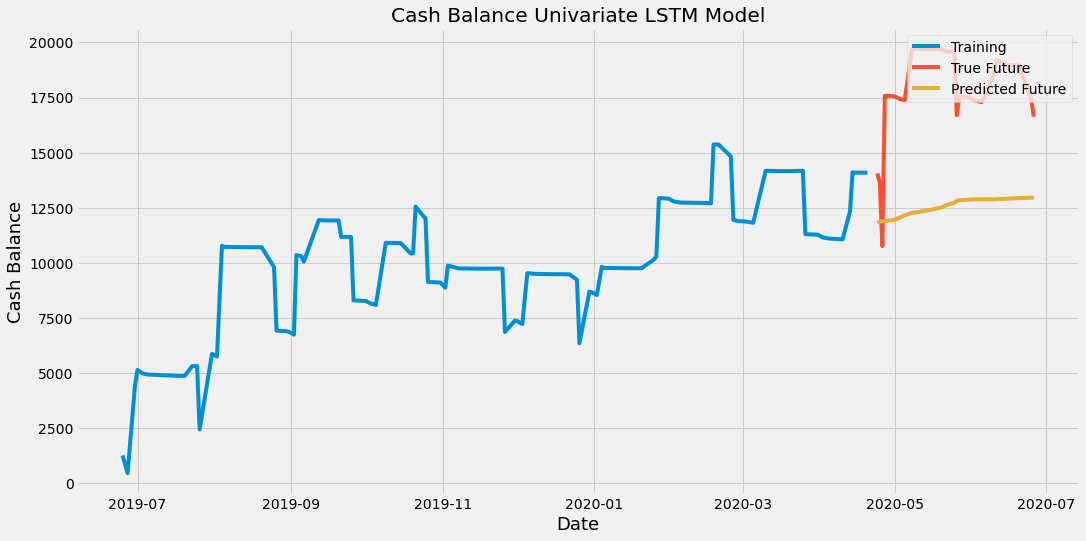

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualise
plt.figure(figsize = (16,8))
plt.title('Cash Balance Univariate LSTM Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Cash Balance', fontsize = 18)
plt.plot(train['Cash Balance'])
plt.plot(valid[['Cash Balance', 'Predictions']])
plt.legend(['Training', 'True Future', 'Predicted Future'], loc = 'upper right')
plt.show()

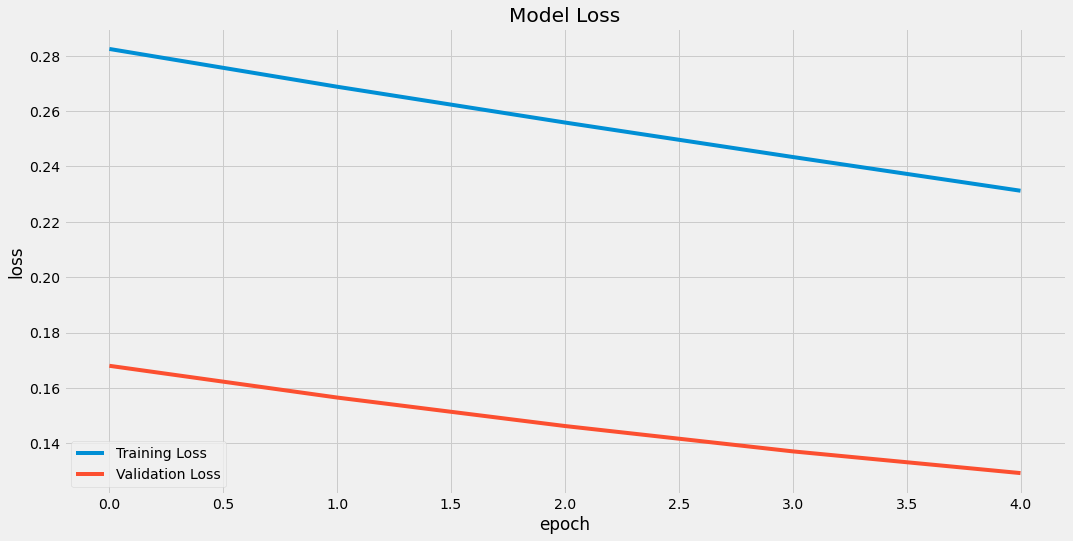

In [19]:
#Visualise loss
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

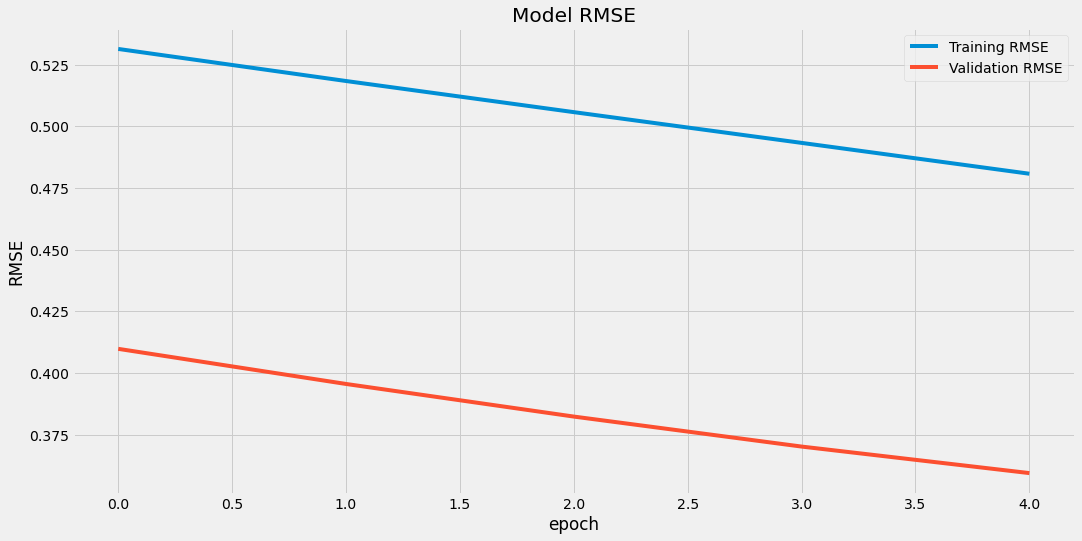

In [20]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()